### Импортируем нужные библиотеки

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn import preprocessing
import seaborn as sns

### Считываем очищенные от лишней информации датасеты и объедененный датасет

In [3]:
sheet_3 = pd.read_excel("23_clean.xlsx", sheet_name=0, index_col=0)
sheet_2 = pd.read_excel("23_clean.xlsx", sheet_name=1, index_col=0)
sheet_joined = pd.read_excel("clean_joined.xlsx", sheet_name=0, index_col=1)

### Стандартизируем

In [4]:
scaler = preprocessing.StandardScaler()

sheet_joined_scaled = scaler.fit_transform(sheet_joined)
sheet_joined_scaled = pd.DataFrame(sheet_joined_scaled)

### Нормализуем

In [5]:
# sheet_joined_normalized = (sheet_joined - sheet_joined.mean()) / sheet_joined.std()
# sheet_joined_normalized = (sheet_joined - sheet_joined.min()) / (sheet_joined.max() - sheet_joined.min())
sheet_joined_normalized = preprocessing.normalize(sheet_joined_scaled)

In [6]:
n_comp = 3
pca = PCA(n_components=n_comp)

In [7]:
pca.fit(sheet_joined)

PCA(n_components=3)

In [8]:
loadings = pd.DataFrame(pca.components_.T, columns=[f"PC{i+1}" for i in range(n_comp)], index=sheet_joined.columns)
loadings

,PC1,PC2,PC3
220.125958,0.999048,-0.043576,0.002135
6.289029,0.007614,0.155851,-0.417259
8.793850,0.037571,0.860122,-0.042845
3.733841,0.011529,0.245211,-0.401208
0.822172,0.003007,0.067838,0.019124
3.092925,0.015440,0.372722,0.429922
1.711174,0.003940,0.080235,-0.214635
1.875641,0.002089,0.038102,-0.212292
1.240593,0.003913,0.122147,0.610228
1.177349,0.004293,0.086838,-0.119889


In [9]:
print(pca.explained_variance_ratio_)

[9.94265758e-01 5.54857099e-03 9.32143838e-05]


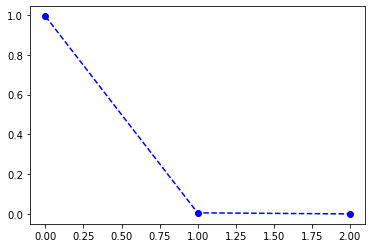

In [10]:
plt.plot(pca.explained_variance_ratio_, 'b--o')

In [212]:
transformed_joined = pca.transform(sheet_joined)
transformed_joined

array([[-6.29770450e+01,  6.85168863e+00, -5.48795699e+00],
       [-2.05890902e+02, -1.86804986e+00, -7.63002455e-01],
       [-8.70364117e+01, -9.10253906e+00,  3.53859496e-01],
       [-1.89669227e+02, -2.35466639e+00, -8.20581664e-01],
       [-1.53331027e+02,  1.70723389e+00, -2.36900157e+00],
       [-2.32086067e+02, -1.31122261e+00,  1.22512237e-01],
       [-2.24187986e+02, -1.42514790e+00,  6.35127254e-02],
       [-1.78875407e+02, -3.74509065e+00, -2.66504049e-01],
       [-1.52518986e+02, -6.08381407e+00, -2.35286221e-01],
       [-1.56602281e+02, -5.95572263e+00,  6.27518466e-02],
       [ 4.11887734e+02, -1.16778980e+01, -3.74788247e+00],
       [-2.84001273e+02, -2.10186894e+00,  6.63816088e-02],
       [-1.66371170e+02, -5.08608858e+00,  1.62283769e-01],
       [-1.95684611e+02, -4.33906315e+00,  2.82827612e-01],
       [-1.77847511e+02, -5.03233853e+00,  1.26835604e-01],
       [-2.79651716e+02,  8.64613553e-02, -4.79712178e-01],
       [-2.77750490e+02, -3.48459150e-01

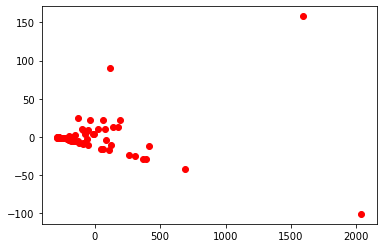

In [213]:
plt.plot(transformed_joined[:,0],transformed_joined[:,1], 'ro')

In [214]:
kmeans_transformed_joined = KMeans(n_clusters=2, random_state=0).fit_predict(transformed_joined)

In [215]:
dbscan_transformed_joined = DBSCAN(eps = 0.8, min_samples=3).fit_predict(transformed_joined)

In [216]:
dbscan_transformed_joined

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1], dtype=int64)

In [217]:
kmeans_transformed_joined

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

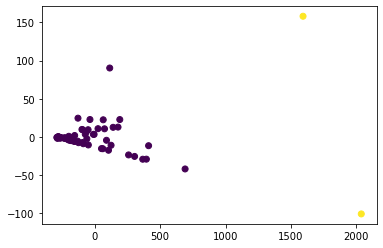

In [218]:
plt.scatter(transformed_joined[:,0],transformed_joined[:,1], c = kmeans_transformed_joined)

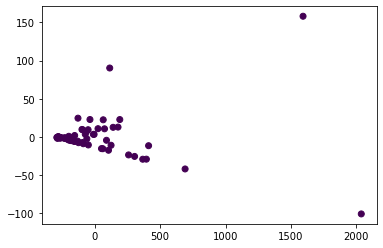

In [219]:
plt.scatter(transformed_joined[:,0],transformed_joined[:,1], c = dbscan_transformed_joined)

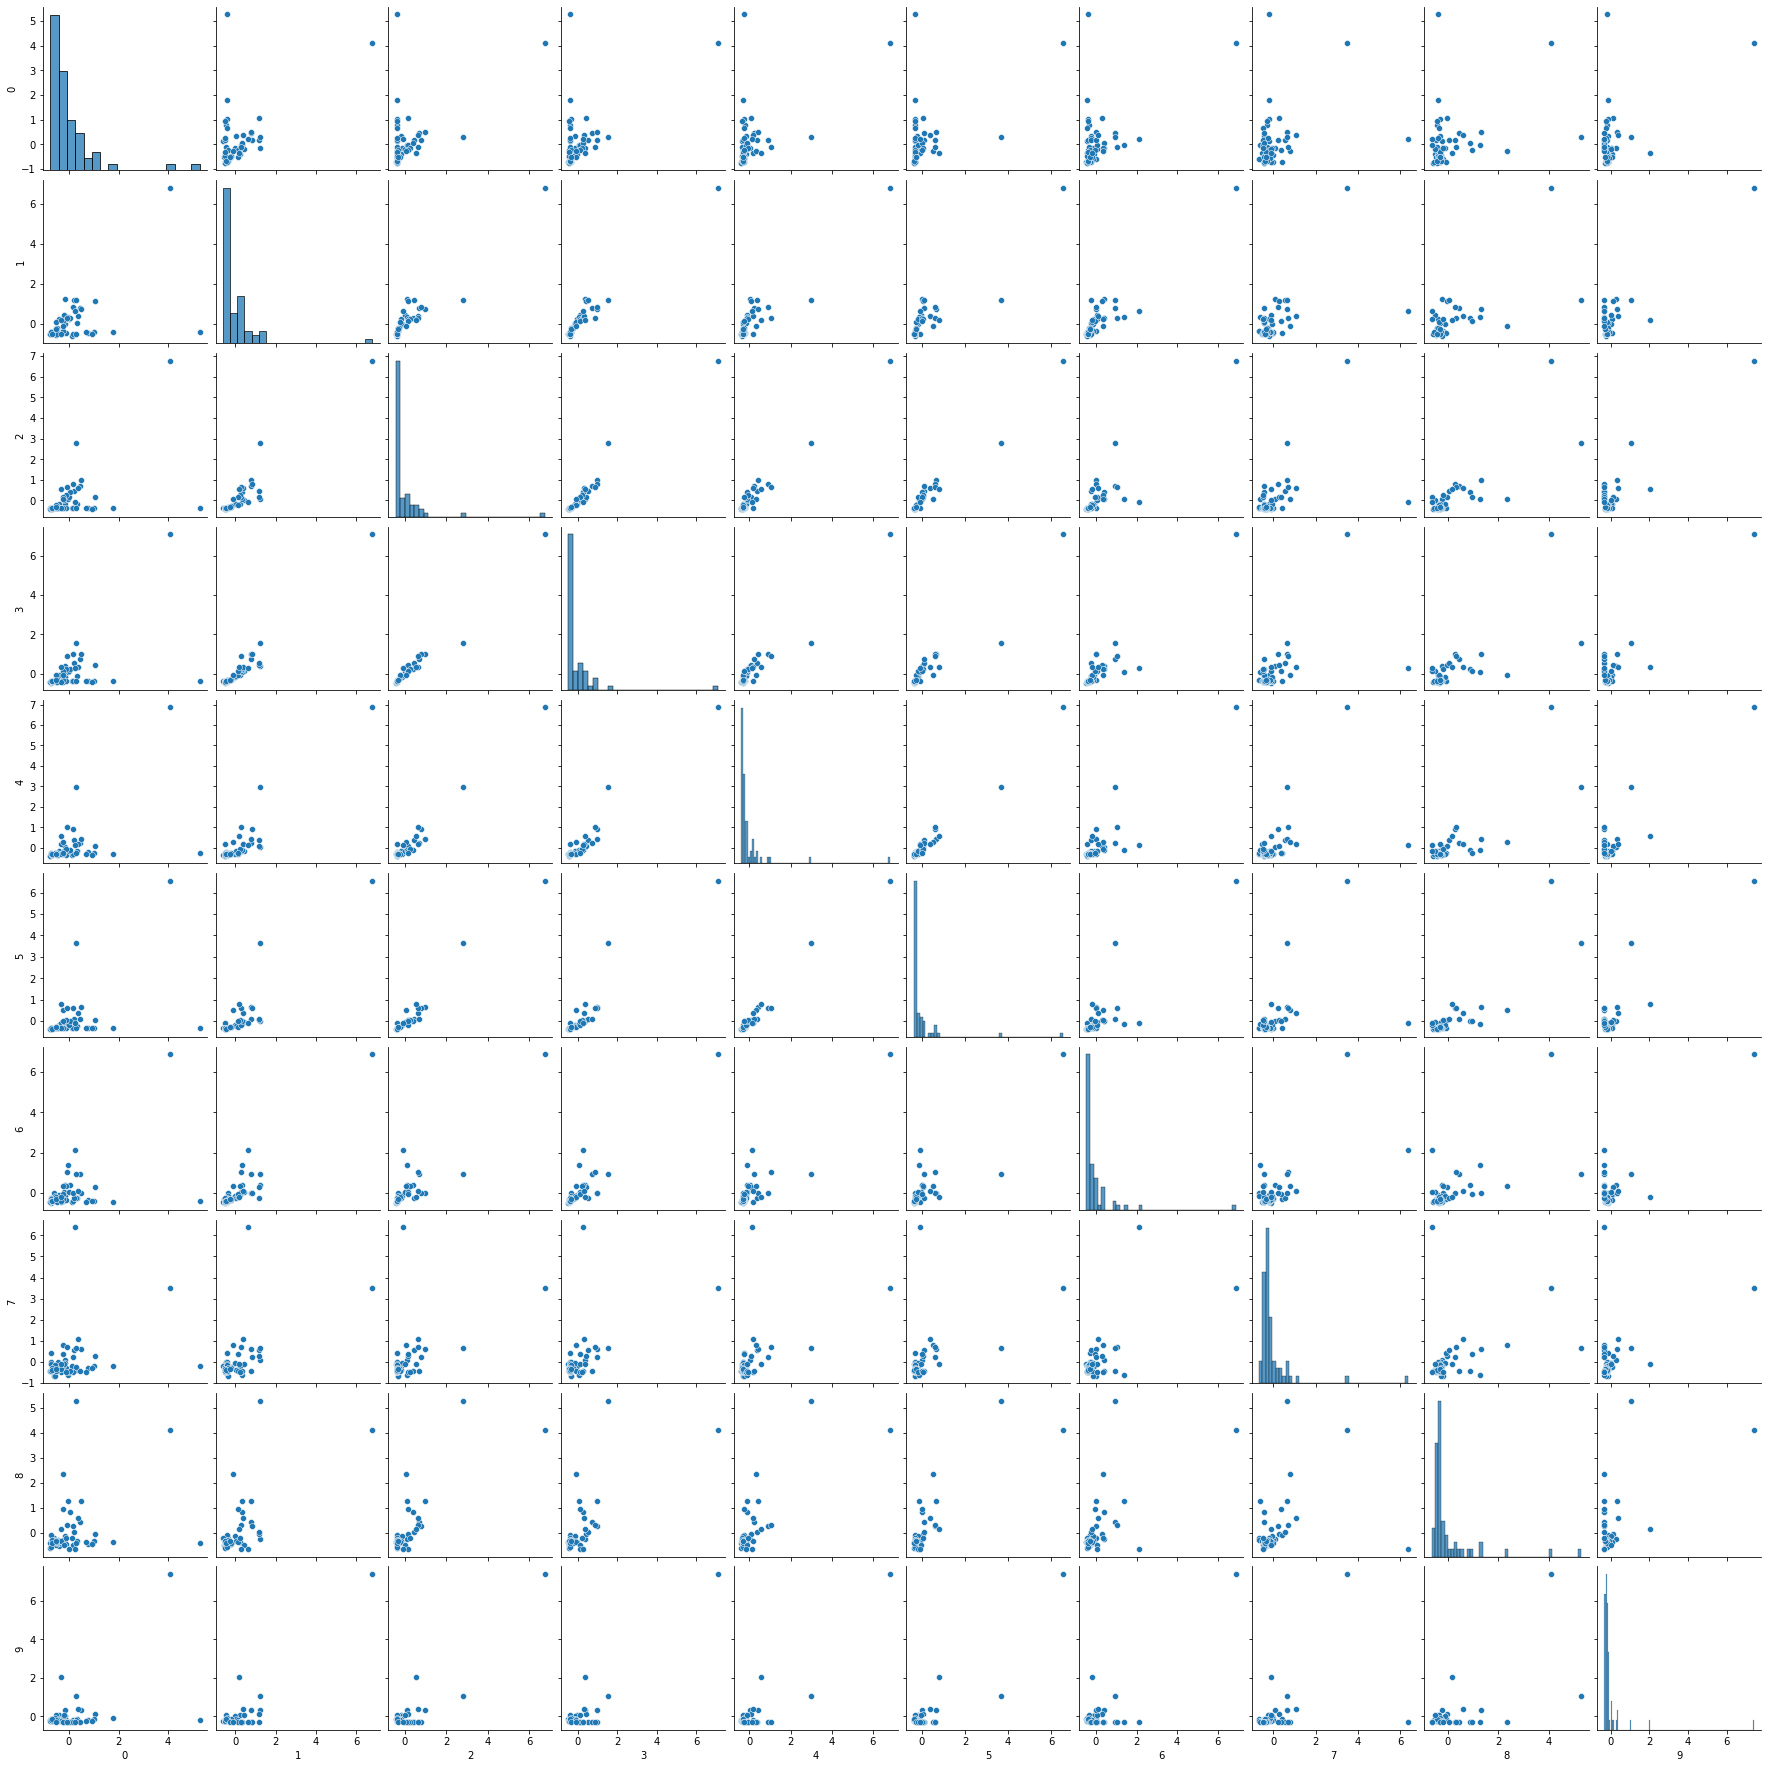

In [220]:
sns.pairplot(pd.DataFrame(sheet_joined_scaled))